# Simple Linear Regression | Regresión Lineal Simple

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Modelo
from sklearn.linear_model import LinearRegression
# Métricas
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score

<!-- TOC -->
* [Simple Linear Regression | Regresión Lineal Simple](#simple-linear-regression--regresión-lineal-simple)
  * [Paso 1. Lectura del conjunto de datos procesado](#paso-1-lectura-del-conjunto-de-datos-procesado)
  * [Paso 2: Análisis y visualización](#paso-2-análisis-y-visualización)
  * [Paso 3. Split](#paso-3-split)
  * [Paso 4: Creación del modelo y entrenamiento](#paso-4-creación-del-modelo-y-entrenamiento)
  * [Paso 5: Predicción del modelo](#paso-5-predicción-del-modelo)
  * [Paso 6: Evaluación del modelo](#paso-6-evaluación-del-modelo)
  * [Paso 7: Optimización de resultados](#paso-7-optimización-de-resultados)
<!-- TOC -->

## Paso 1. Lectura del conjunto de datos procesado

Para ejemplificar la implementación de un modelo de regresión lineal simple utilizaremos un conjunto de datos con pocas instancias y que ya ha sido previamente tratado con un EDA completo.

In [5]:
df_train = pd.read_csv('../../data/clean-salary-train.csv')

df_train.head()

FileNotFoundError: [Errno 2] No such file or directory: '../../data/clean-salary-train.csv'

In [ ]:
df_train.shape

(24, 2)

In [ ]:
df_test = pd.read_csv('../../data/clean-salary-test.csv')

df_test.head(6)

,YearsExperience,Salary
0,1.5,37731.0
1,3.0,60150.0
2,4.5,61111.0
3,6.8,91738.0
4,8.2,113812.0
5,10.3,122391.0


In [ ]:
df_test.shape

(6, 2)

## Paso 2: Análisis y visualización

Utilizando un diagrama de puntos se visualizará la relación entre la variable predictora y la objetivo (esto se ve en el análisis univariante):

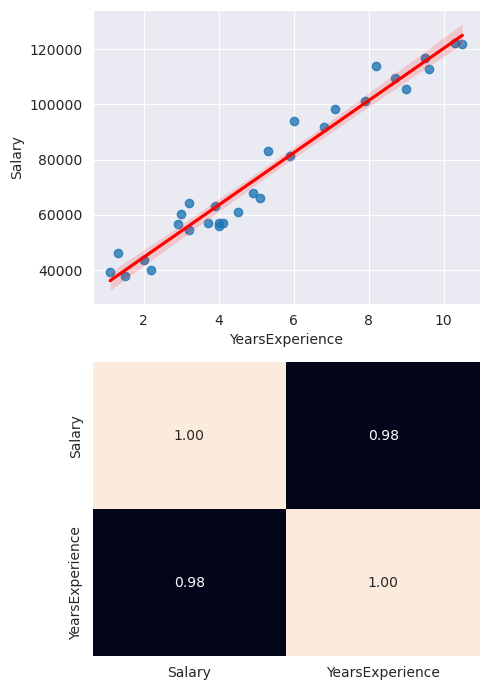

In [ ]:
df = pd.concat([df_train, df_test])

fig, axis = plt.subplots(2, 1, figsize=(5, 7))
sns.regplot(ax=axis[0],
            data=df,
            x="YearsExperience",
            y="Salary",
            line_kws={'color': 'red'})
sns.heatmap(ax=axis[1],
            data=df[["Salary", "YearsExperience"]].corr(),
            annot=True,
            fmt=".2f",
            cbar=False)

plt.tight_layout()
plt.show()

> Observaciones
>
> Existe una clara relación lineal entre la variable predictora y la objetivo, así que puede ser fácilmente modelable por este tipo de modelos.
>
> Si la correlación fuera inferior, el modelo no tendría una buena precisión.

## Paso 3. Split

El conjunto *train* lo utilizaremos para entrenar el modelo, mientras que el conjunto *test* lo evaluaremos para medir su grado de efectividad. Dividiremos también las predictoras de las características.

Además, al haber únicamente una variable predictora, no es necesario aplicar una normalización. En el caso de que hubiera varias, sí que habría que aplicarla.

In [ ]:
X_train = df_train.drop(["Salary"], axis=1)
y_train = df_train["Salary"]

X_test = df_test.drop(["Salary"], axis=1)
y_test = df_test["Salary"]

## Paso 4: Creación del modelo y entrenamiento

In [ ]:
# Creamos el modelo con valores por defecto
model = LinearRegression()
model.fit(X_train, y_train)  # Entrenamos

LinearRegression()

Después del proceso de entrenamiento podemos conocer los parámetros (variables $a$ y $b$) que ha ajustado el modelo:

In [ ]:
intercept = model.intercept_
coefficient =  model.coef_[0]

intercept, coefficient

(26354.430697012205, 9277.783079709889)

In [ ]:
model.score(X_train, y_train)  # r2 score

0.9547868727526799

## Paso 5: Predicción del modelo

In [ ]:
X_test

,YearsExperience
0,1.5
1,3.0
2,4.5
3,6.8
4,8.2
5,10.3


In [ ]:
y_test

0     37731.0
1     60150.0
2     61111.0
3     91738.0
4    113812.0
5    122391.0
Name: Salary, dtype: float64

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([ 40271.10531658,  54187.77993614,  68104.45455571,  89443.35563904,
       102432.25195063, 121915.59641802])

Para comparar el valor predicho del original, podemos realizar un gráfico comparativo como el siguiente:

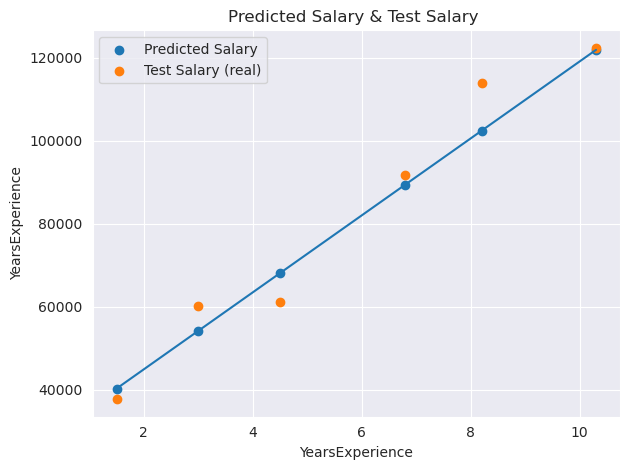

In [ ]:
plt.scatter(x=df_test["YearsExperience"],
            y=y_pred,
            label="Predicted Salary",)
# Utilizamos los parámetros ajustados en el entrenamiento para dibujar la línea de regresión en el gráfico
sns.lineplot(x=df_test["YearsExperience"],
             y=df_test["YearsExperience"].apply(lambda x: intercept + coefficient * x))
plt.scatter(x=df_test["YearsExperience"],
            y=df_test["Salary"],
            label="Test Salary (real)")

plt.title("Predicted Salary & Test Salary ")
plt.legend()
plt.tight_layout()
plt.show()

> Observaciones
>
> El test predicho por el modelo se ajusta a la ecuación de regresión, ya que es la que ha aprendido el modelo (derecha)
>
> Los puntos naranjas representa los valores reales, mientras que los azules los valores predichos.

## Paso 6: Evaluación del modelo

Para calcular la efectividad del modelo utilizaremos el **error cuadrático medio** (*MSE*) y el **coeficiente de determinación** ($R^2$), unas de las métricas más populares:

In [ ]:
metrics = {'MSE': mean_squared_error(y_test, y_pred),
           'RMSE': root_mean_squared_error(y_test, y_pred),
           'MAPE' : mean_absolute_percentage_error(y_test, y_pred),
           'R^2': r2_score(y_test, y_pred),}

metrics

{'MSE': 37649779.45133659,
 'RMSE': 6135.941610815457,
 'MAPE': 0.06829451478893599,
 'R^2': 0.959714925174946}

> Conclusiones:
>
> Cuanto menor sea el valor del RMSE, mejor será el modelo. (+- 6136 u$s)
>
> El valor del $R^2$, es de un 95%, por lo que es satisfactorio.

## Paso 7: Optimización de resultados

Este tipo de modelos no se pueden optimizar, debido a la ausencia de hiperparámetros.